In [4]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai import SmartDatalake
from pandasai.llm import GooglePalm
from pandasai import Agent
import os
import PIL.Image
import matplotlib

# matplotlib.use("TkAgg")

from pandasai.responses.response_parser import ResponseParser
from dotenv import load_dotenv
env_loaded = load_dotenv()



In [2]:
class StreamlitResponse(ResponseParser):
    def __init__(self, context) -> None:
        super().__init__(context)

    def format_dataframe(self, result):
        st.dataframe(result["value"])
        return

    def format_plot(self, result):
        st.image(result["value"])
        return

    def format_other(self, result):
        st.write(result["value"])
        return


In [9]:
# Sample DataFrame
# df = pd.DataFrame({
#     "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
#     "gdp": [19294482071552, 2891615567872, 2411255037952, 3435817336832, 1745433788416, 1181205135360, 1607402389504, 1490967855104, 4380756541440, 14631844184064],
#     "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12]
# })


df2 = "data/StudentsPerformance.csv"
# df = dl = SmartDatalake([df2])

In [12]:
api_key = os.getenv("GOOGLE_API_KEY")
llm = GooglePalm(api_key=api_key)
# df = SmartDataframe(df2, config={"llm": llm})
df = SmartDataframe(df2)
df

user_defined_path = os.getcwd()
agent = Agent([df],description="This is my DataFrame", config={
    "save_charts": True,
    "save_charts_path": user_defined_path,
    "llm": llm,
    
})
# query_engine = SmartDataframe(
#         df,
#         config={
#             "llm": llm,
#             "response_parser": StreamlitResponse,
#         },
#     )

TypeError: Agent.__init__() got an unexpected keyword argument 'description'

In [37]:
# df.chat('Which are the 5 happiest countries?')
agent.chat('Which are the 5 happiest countries?')

,country,gdp,happiness_index
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
1,United Kingdom,2891615567872,7.16
3,Germany,3435817336832,7.07
0,United States,19294482071552,6.94


In [14]:
df.chat('who is most happiest country?')

TypeError: DataframeAbstract.plot() takes 1 positional argument but 2 were given

'Unfortunately, I was not able to answer your question, because of the following error:\n\nexpected str, bytes or os.PathLike object, not Figure\n'

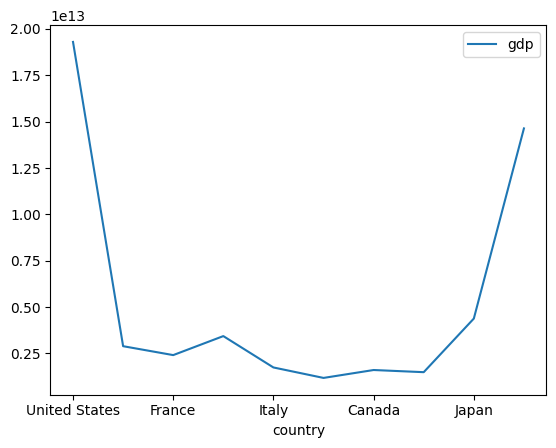

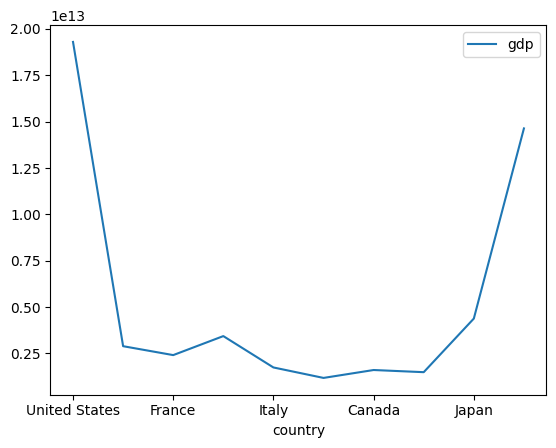

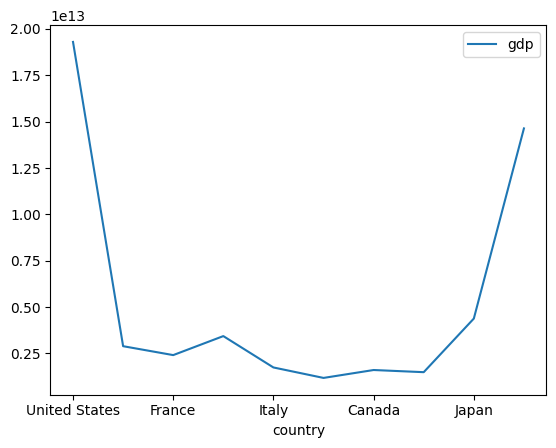

In [5]:
# response = agent.chat('What is the GDP of the United States?')
# explanation = agent.explain()

# print("The answer is", response)
# print("The explanation is", explanation)
# df.chat("Plot a chart of gdp by country")
# ans = agent.chat("Plot a chart of gdp by country with data label")
# agent.chat("Plot a chart of gdp by country")
query_engine.chat("Plot a chart of gdp by country")